In [1]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Orgienhaus,2000
1,Invasion of the Reptoids,2011
2,All the President's Men,1976
3,Det glada kalaset,1946
4,Into the Wake,2012


In [2]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

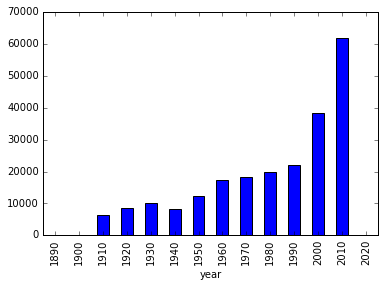

In [7]:
titles.groupby(titles.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

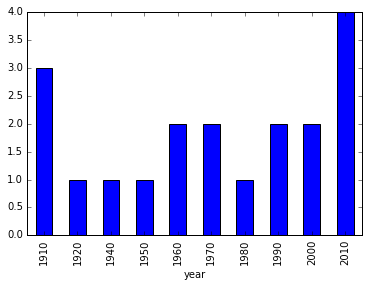

In [32]:
t = titles[titles.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [41]:
c = cast[cast.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year','type']).size()

year  type   
1950  actor      615
      actress    277
1951  actor      643
      actress    275
1952  actor      598
      actress    288
1953  actor      641
      actress    294
1954  actor      635
      actress    303
1955  actor      620
      actress    272
1956  actor      631
      actress    296
1957  actor      716
      actress    291
1958  actor      703
      actress    280
1959  actor      692
      actress    305
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [45]:
c = cast[(cast.year // 10 == 195) & (cast.n <= 5)]
c.groupby(['n','type']).size()

n    type   
1.0  actor      6494
     actress    2881
2.0  actor      4462
     actress    4481
3.0  actor      5489
     actress    3092
4.0  actor      5484
     actress    2799
5.0  actor      5512
     actress    2496
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [8]:
c = cast[cast.title == "The Pink Panther"]
c.groupby('year').size()
c

year
1963    19
2006    89
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [81]:
c = cast[cast.name == 'Frank Oz']
c = c.groupby(['year','title']).size()
c[c>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [6]:
c = cast[cast.name == 'Frank Oz']
c = c.groupby('character').size()
#c = c.sort_values()
c[c>1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64